In [1]:
#Install the Packages


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
#Import Data

import yfinance

In [3]:
data = yfinance.download (tickers = "^BSESN ^FTSE ^GDAXI", start = "2001-01-07", end = "2020-04-17", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  3 of 3 completed


In [4]:
data.head(50)

^FTSE                                                       \
                   Open         High          Low        Close        Volume   
Date                                                                           
2001-01-08  6198.100098  6212.399902  6137.700195  6149.600098  1.449404e+09   
2001-01-09  6149.600098  6195.899902  6066.399902  6088.100098  1.321566e+09   
2001-01-10  6088.100098  6119.899902  6040.399902  6059.899902  1.621626e+09   
2001-01-11  6059.899902  6114.899902  6052.100098  6114.899902  1.505214e+09   
2001-01-12  6114.899902  6178.500000  6109.799805  6165.500000  1.501605e+09   
2001-01-15  6165.500000  6193.399902  6148.799805  6170.299805  7.367270e+08   
2001-01-16  6170.299805  6173.799805  6076.700195  6083.299805  1.239263e+09   
2001-01-17  6083.299805  6205.500000  6083.299805  6197.399902  1.488431e+09   
2001-01-18  6197.399902  6220.600098  6174.799805  6209.899902  1.167056e+09   
2001-01-19  6209.899902  6276.399902  6186.399902  6209.299805  1.598592e+09   
2001-01-22  6209.299805  6252.299805  6162.899902  6232.000000  1.183097e+09   
2001-01-23  6232.000000  6232.299805  6187.899902  6214.700195  8.530520e+08   
2001-01-24  6214.700195  6309.200195  6214.700195  6264.399902  1.183691e+09   
2001-01-25  6264.399902  6296.899902  6229.299805  6255.600098  1.302157e+09   
2001-01-26  6255.600098  6295.000000  6223.799805  6294.299805  1.240417e+09   
2001-01-29  6294.299805  6335.100098  6269.399902  6317.000000  9.341730e+08   
2001-01-30  6317.000000  6337.399902  6300.200195  6334.500000  1.124787e+09   
2001-01-31  6334.500000  6360.299805  6264.899902  6297.500000  1.631544e+09   
2001-02-01  6297.500000  6309.899902  6233.399902  6251.799805  1.227940e+09   
2001-02-02  6251.799805  6290.600098  6251.799805  6256.399902  1.065183e+09   
2001-02-05  6256.399902  6281.299805  6237.100098  6269.200195  9.591060e+08   
2001-02-06  6269.200195  6306.700195  6262.600098  6293.399902  1.315786e+09   
2001-02-07  6293.399902  6293.399902  6197.299805  6225.700195  1.856200e+09   
2001-02-08  6225.600098  6265.500000  6202.899902  6206.100098  1.084611e+09   
2001-02-09  6206.100098  6213.600098  6153.100098  6164.299805  1.567588e+09   
2001-02-12  6164.299805  6241.399902  6155.500000  6241.399902  9.865810e+08   
2001-02-13  6241.399902  6263.299805  6209.000000  6228.500000  1.172373e+09   
2001-02-14  6228.500000  6228.500000  6131.600098  6176.200195  1.588897e+09   
2001-02-15  6176.200195  6212.700195  6155.500000  6197.899902  1.153271e+09   
2001-02-16  6197.899902  6197.899902  6082.799805  6088.299805  1.125269e+09   
2001-02-19  6088.299805  6102.200195  6065.200195  6094.000000  8.750820e+08   
2001-02-20  6094.000000  6134.000000  5974.799805  5980.100098  1.048942e+09   
2001-02-21  5980.100098  5998.899902  5921.700195  5972.399902  1.311299e+09   
2001-02-22  5972.399902  6011.299805  5937.100098  6003.100098  1.270788e+09   
2001-02-23  6003.100098  6023.399902  5904.700195  5943.700195  1.073539e+09   
2001-02-26  5943.700195  6003.500000  5913.799805  5916.799805  9.858850e+08   
2001-02-27  5916.700195  5975.299805  5906.899902  5941.200195  1.106443e+09   
2001-02-28  5941.200195  5997.000000  5901.700195  5917.899902  1.202259e+09   
2001-03-01  5917.899902  5949.200195  5868.100098  5908.600098  1.356359e+09   
2001-03-02  5908.600098  5924.100098  5829.500000  5858.600098  1.269277e+09   
2001-03-05  5858.600098  5931.299805  5856.899902  5931.299805  9.486740e+08   
2001-03-06  5931.299805  6027.600098  5928.000000  6012.000000  1.448596e+09   
2001-03-07  6012.000000  6035.299805  5969.600098  6001.799805  1.301027e+09   
2001-03-08  6001.799805  6050.399902  5982.000000  6003.200195  1.306219e+09   
2001-03-09  6003.200195  6003.200195  5908.899902  5917.299805  8.545930e+08   
2001-03-12  5917.299805  5917.299805  5786.299805  5826.500000  9.544070e+08   
2001-03-13  5826.500000  5826.500000  5720.700195  5720.700195  1.264301e+09   
2001-03-14  5720.7

In [5]:
df_comp = data.copy()

In [6]:
#Select Only Closing Price and give new names

df_comp["Sensex"] = df_comp["^BSESN"].Close[:]

df_comp["FTSE"] = df_comp["^FTSE"].Close[:]

df_comp["DAX"] = df_comp["^GDAXI"].Close[:]

In [7]:
#Delete all other columns

df_comp = df_comp.iloc[1:]

del df_comp["^FTSE"]

del df_comp["^GDAXI"]

del df_comp["^BSESN"]

In [8]:
df_comp.head()

,Sensex,FTSE,DAX
,,,
Date,,,
2001-01-09,4125.310059,6088.100098,6404.520020
2001-01-10,4047.639893,6059.899902,6320.069824
2001-01-11,4027.129883,6114.899902,6465.209961
2001-01-12,4036.580078,6165.500000,6490.029785
2001-01-15,4046.760010,6170.299805,6522.870117


In [10]:
#Only Include Business Days

df_comp = df_comp.asfreq("b")

In [11]:
df_comp.isna().sum()

Sensex      289
FTSE        172
DAX         140
dtype: int64

In [12]:
#Fill the Missing Values. Here Forward Fill shall be considered

df_comp = df_comp.fillna(method = "ffill")

In [13]:
#Check if any missing values are present

df_comp.isna().sum()

Sensex      0
FTSE        0
DAX         0
dtype: int64

# Now Returns Column for Every Index

In [14]:
df_comp["ret_sensex"] = df_comp.Sensex.pct_change(1)*100

df_comp["ret_ftse"] = df_comp.FTSE.pct_change(1) *100

df_comp["ret_dax"] = df_comp.DAX.pct_change(1)*100

In [15]:
#Check the Data

df_comp.head()

,Sensex,FTSE,DAX,ret_sensex,ret_ftse,ret_dax
,,,,,,
Date,,,,,,
2001-01-09,4125.310059,6088.100098,6404.520020,NaN,NaN,NaN
2001-01-10,4047.639893,6059.899902,6320.069824,-1.882772,-0.463202,-1.318603
2001-01-11,4027.129883,6114.899902,6465.209961,-0.506715,0.907606,2.296496
2001-01-12,4036.580078,6165.500000,6490.029785,0.234663,0.827489,0.383898
2001-01-15,4046.760010,6170.299805,6522.870117,0.252192,0.077849,0.506012


Obviously some missing values will be created on first columns because there is no PREVIOUS PERIOD for the first column


In [16]:
#Sampling

#A preprocessed copy just incase
preprocessed = df_comp

In [19]:
#Set Size 80%

size = int(len(df_comp)*0.8)

df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

We had to use int because numbers are floating point and python will show error during indexing

In [20]:
df.tail()

,Sensex,FTSE,DAX,ret_sensex,ret_ftse,ret_dax
,,,,,,
Date,,,,,,
2016-06-02,26843.140625,6185.600098,10208.000000,0.483684,-0.101743,0.034883
2016-06-03,26843.029297,6209.600098,10103.259766,-0.000415,0.387998,-1.026060
2016-06-06,26777.449219,6273.399902,10121.080078,-0.244310,1.027438,0.176382
2016-06-07,27009.669922,6284.500000,10287.679688,0.867225,0.176939,1.646066
2016-06-08,27020.660156,6301.500000,10217.030273,0.040690,0.270507,-0.686738


In [21]:
df_test.head()

,Sensex,FTSE,DAX,ret_sensex,ret_ftse,ret_dax
,,,,,,
Date,,,,,,
2016-06-09,26763.460938,6231.899902,10088.870117,-0.951861,-1.104500,-1.254378
2016-06-10,26635.750000,6115.799805,9834.620117,-0.477184,-1.862997,-2.520104
2016-06-13,26396.769531,6045.000000,9657.440430,-0.897217,-1.157654,-1.801592
2016-06-14,26395.710938,5923.500000,9519.200195,-0.004010,-2.009926,-1.431438
2016-06-15,26726.339844,5966.799805,9606.709961,1.252586,0.730983,0.919297


See the tail and head

# Our Data is Ready, lets try AUTO-ARIMA.

In [28]:
#Import the Library

#Important note while installing pmdarima, use --user after install code else it will give some error.

from pmdarima.arima import auto_arima

In [29]:
#Initiate the model
model_auto = auto_arima(df.ret_sensex[1:])


C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
#See the Model Summary

model_auto

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

We can see it is ARMA (2,2) model. This is just a simple model wihout parameters.

In [31]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4021
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -7207.798
Date:                Sat, 18 Apr 2020   AIC                          14427.596
Time:                        13:04:17   BIC                          14465.392
Sample:                             0   HQIC                         14440.990
                               - 4021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1488      0.062      2.392      0.017       0.027       0.271
ar.L1         -0.9309      0.086    -10.830      0.000      -1.099      -0.762
ar.L2         -0.6644      0.067     -9.925      0.000      -0.796      -0.533
ma.L1          0.9936      0.082     12.088      0.000       0.832       1.155
ma.L2          0.7108      0.063     11.315      0.000       0.588       0.834
sigma2         2.1111      0.022     94.561      0.000       2.067       2.155
===================================================================================
Ljung-Box (Q):                       82.82   Jarque-Bera (JB):             13203.62
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Now Lets predict

In [169]:
df_test.head()

#Set Start and End Date of Predictions
start_date = "2016-06-09"
end_date = "2017-01-01"


In [92]:
predict_auto =pd.DataFrame(model_auto.predict(n_periods= len(df_test[start_date:end_date])),
                           index= df_test[start_date:end_date].index)

Text(0.5, 1.0, 'Predictions for SENSEX Returns')

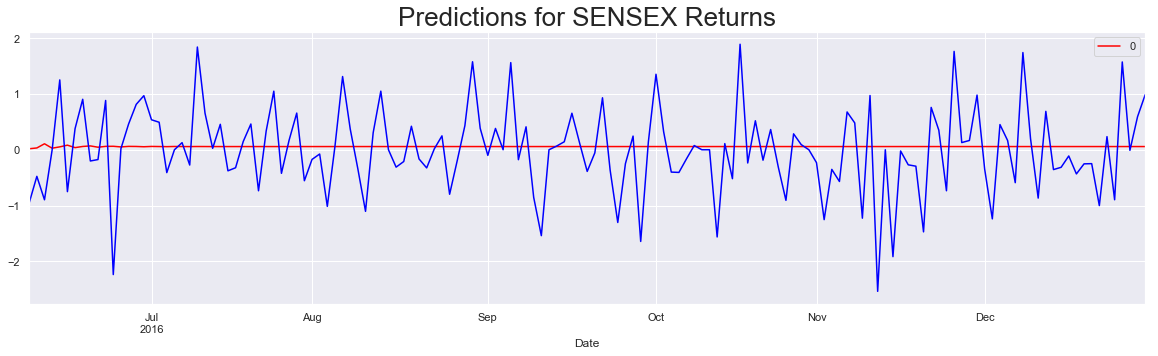

In [93]:
predict_auto.plot(figsize=(20,5), color = "Red")

df_test.ret_sensex[start_date:end_date].plot(color = "blue")

plt.title("Predictions for SENSEX Returns" , size=26)

We can see that the predicitons dont really match due to absense of EXOGENOUS VARIABLES.

# Now Lets Build Auto-Arima with Arguments

In [32]:

# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# return_valid_fits -> whether or not the method should validate the results 
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple_size -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

In [40]:
model_auto1 = auto_arima(df_comp.ret_sensex[1:], exogenous=df_comp[["ret_ftse","ret_dax"]][1:],
                         m=5,max_order=None,max_p=7,max_q=7,
                        max_d=2, max_P=4, max_Q=4, max_D=2, 
                         maxiter=50, alpha = 0.05, n_jobs = -1,
                        trend = 'ct', information_criteria = "oob",
                        out_of_sample_size = int(len(df_comp)*0.2))

C:\Users\Akshay\AppData\Roaming\Python\Python36\site-packages\pmdarima\arima\auto.py:303: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  'Falling back to stepwise parameter search.' % n_jobs)
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Akshay\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimi

In [50]:
model_auto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5027
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -8417.003
Date:                Sun, 19 Apr 2020   AIC                          16848.006
Time:                        00:12:13   BIC                          16893.664
Sample:                             0   HQIC                         16864.004
                               - 5027                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0853      0.041      2.091      0.037       0.005       0.165
drift      -2.048e-05    1.1e-05     -1.870      0.061   -4.19e-05    9.81e-07
x1             0.3776      0.019     19.494      0.000       0.340       0.416
x2             0.0758      0.018      4.289      0.000       0.041       0.110
ar.L1          0.3750      0.252      1.486      0.137      -0.120       0.870
ma.L1         -0.4017      0.250     -1.608      0.108      -0.891       0.088
sigma2         1.6569      0.013    124.778      0.000       1.631       1.683
===================================================================================
Ljung-Box (Q):                      120.88   Jarque-Bera (JB):             26265.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# PREDICTIONS For Auto Arima (with Parameters)

In [94]:
predict_auto1 =pd.DataFrame(model_auto1.predict(n_periods=len(df_test[start_date:end_date]),exogenous=df_test[["ret_ftse","ret_dax"]]
                                    [start_date:end_date]), index = df_test[start_date:end_date].index)

Text(0.5, 1.0, 'Predictions for SENSEX Returns (Complex Auto Arima)')

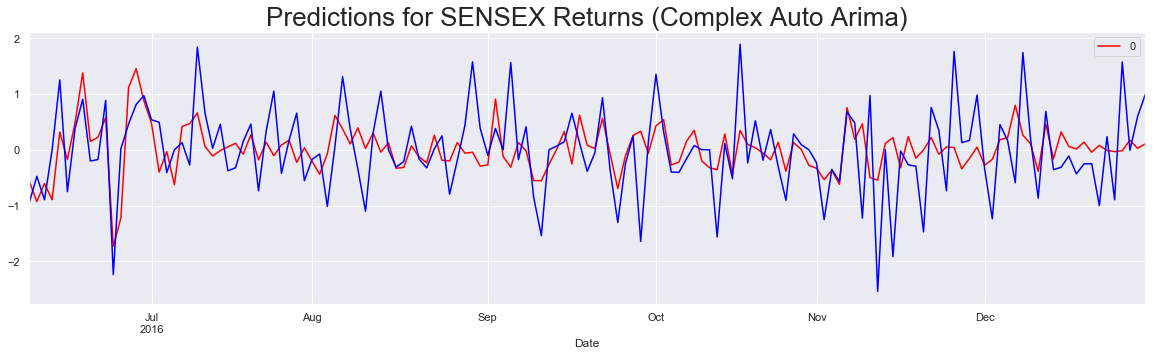

In [96]:
predict_auto1.plot(figsize=(20,5), color = "Red")

df_test.ret_sensex[start_date:end_date].plot(figsize= (20,5),color = "blue")

plt.title("Predictions for SENSEX Returns (Complex Auto Arima)" , size=26)

Inclusion of Exogenous Variables does make our predictions better.

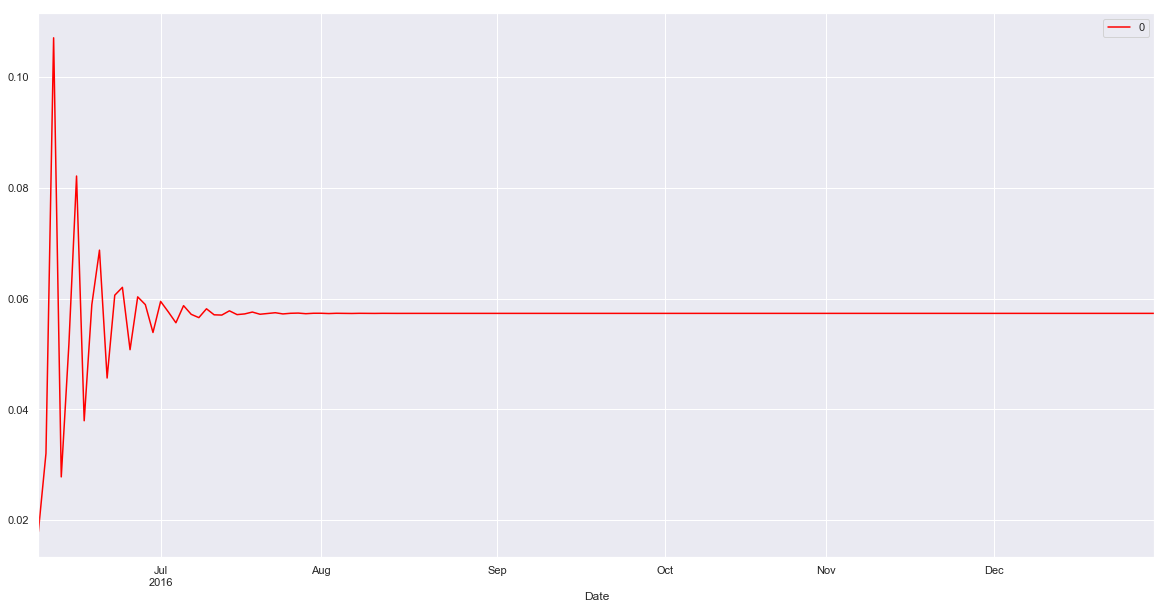

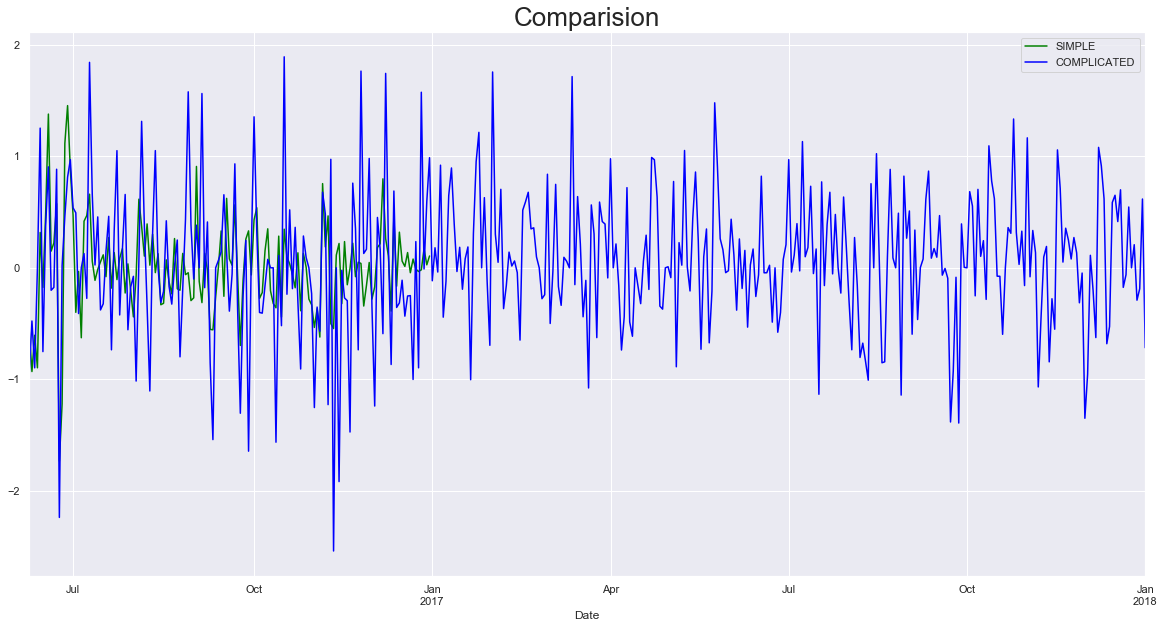

In [116]:
#Combine Both Predictions

predict_auto[start_date:end_date].plot(figsize=(20,10), color = "Red")
predict_auto1[start_date:end_date].plot(figsize=(20,10), color = "Green")
df_test.ret_sensex[start_date:end_date].plot(figsize= (20,10),color = "blue")

plt.title("Comparision" , size=26)

plt.legend(["SIMPLE","COMPLICATED"])

plt.show()

# FORECAST VOLATALITY

In [130]:
#Using Simple GARCH
from arch import arch_model
mod_garch = arch_model(df_comp.ret_sensex[1:],vol="GARCH", p=1,q=1, mean="constant",dist="normal")

res_garch = mod_garch.fit(last_obs = start_date, update_freq= 10)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6574.185891036231
            Iterations: 8
            Function evaluations: 61
            Gradient evaluations: 8


In [131]:
pred_garch = res_garch.forecast(horizon =1, align="target")

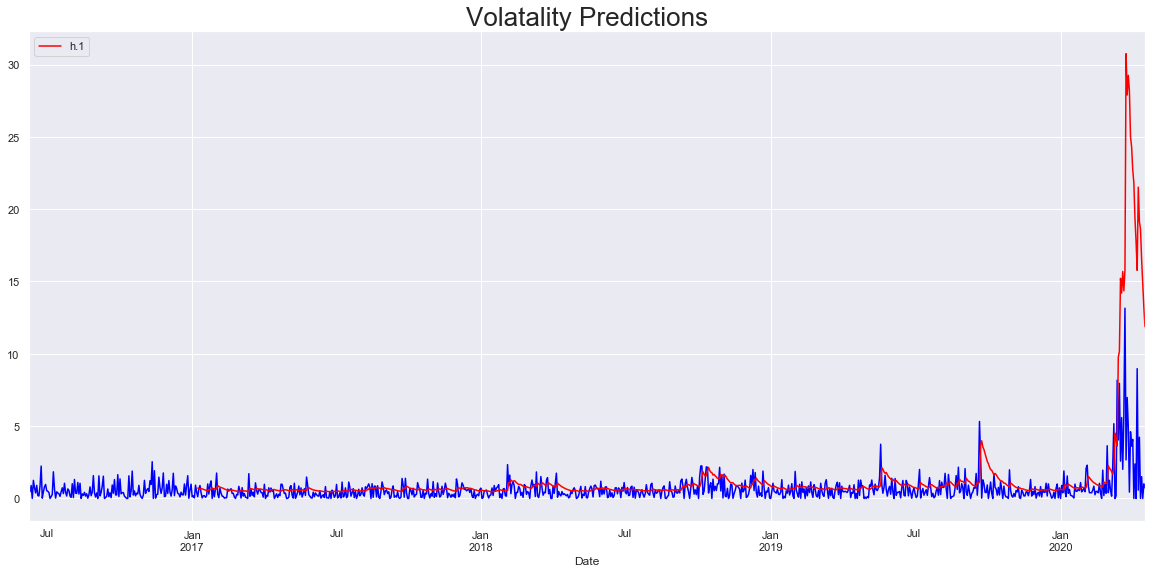

In [139]:
start_date = "2017-01-09"

pred_garch.residual_variance[start_date:].plot(figsize=(20,9),color= 'red', zorder=2)
df_test.ret_sensex.abs().plot(color = "blue", zorder = 1)
plt.title("Volatality Predictions", size = 26)

plt.show()

In [140]:
#Till Feb 2020 our model predicted Volatality well, but due to corona virus we can see how our model predicted.

In [141]:
pred_garch = res_garch.forecast(horizon =100, align="target")



In [144]:
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-16,11.877265,13.022345,14.414464,15.692968,17.36444,17.540513,19.360888,14.015317,15.491043,16.567642,...,1.787642,1.795656,1.796987,1.806619,1.802293,1.809934,1.817084,1.823559,1.832654,1.829279


# MultiVariate Models

In [146]:
#Load the Library

from statsmodels.tsa.api import VAR

In [147]:
df_ret = df[["ret_dax", "ret_ftse", "ret_sensex"]][1:]

In [150]:
#Build the Model

model_multivar = VAR(df_ret)

model_multivar.select_order(20)

results_multivar = model_multivar.fit(ic="aic")

In [151]:
results_multivar.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 19, Apr, 2020
Time:                     23:29:08
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.816358
Nobs:                     4009.00    HQIC:                  0.703816
Log likelihood:          -18241.5    FPE:                    1.90033
AIC:                     0.642028    Det(Omega_mle):         1.84867
--------------------------------------------------------------------
Results for equation ret_dax
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.024519         0.024330            1.008           0.314
L1.ret_dax             0.030772         0.028070            1.096           0.273
L1.ret_ftse           -0.095903         0.036392      

Very Poor Correlation between FTSE and DAX vs Sensex while FTSE and DAX are highly correlated. 

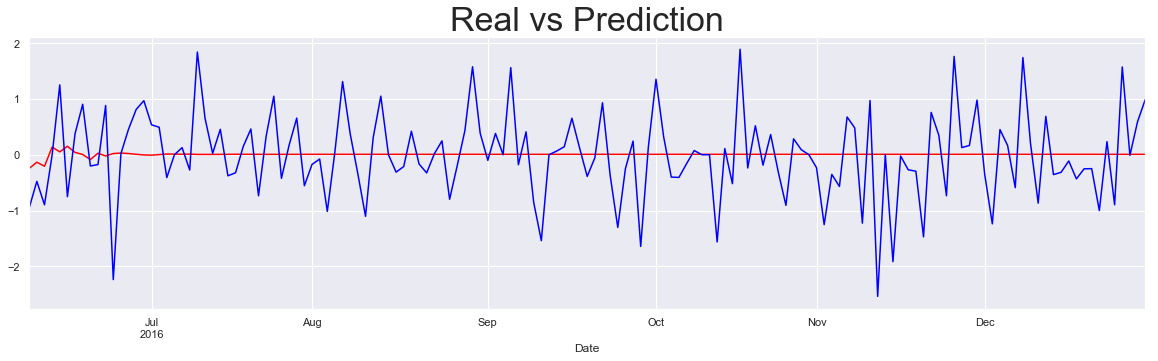

In [170]:
#Plot

lag_order_ret = results_multivar.k_ar

var_pred_ret = results_multivar.forecast(df_ret.values[-lag_order_ret:],len(df_test[start_date:end_date]))

df_ret_pred = pd.DataFrame(data = var_pred_ret,index= df_test[start_date:end_date].index,
                          columns = df_test[start_date:end_date].columns[2:5])

df_ret_pred.ret_sensex[start_date:end_date].plot(figsize = (20,5), color = "red")

df_test.ret_sensex[start_date:end_date].plot(color = "blue")

plt.title("Real vs Prediction", size =34)

plt.show()

Not a relevant result

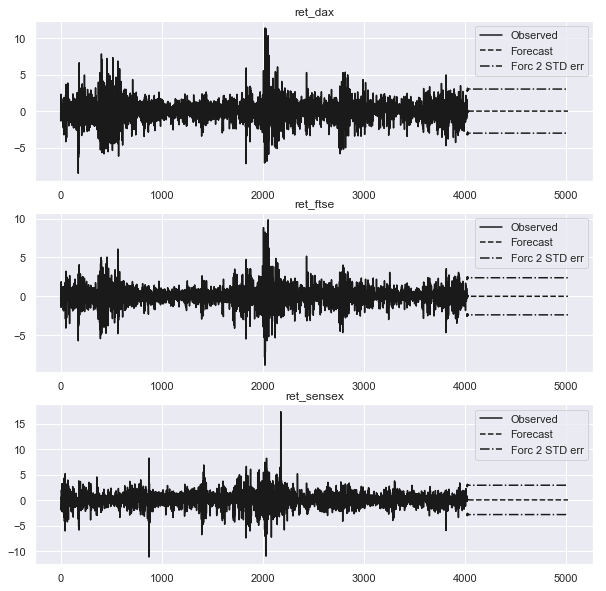

In [172]:
#Lets forecast

results_multivar.plot_forecast(1000)
plt.show()